In [17]:
# !pip install pydot
# !pip install wandb

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2021-11-06 15:20:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-06 15:20:34 (60.3 MB/s) - 'helper_functions.py.1’ saved [10246/10246]



In [67]:
import wandb
# wandb.tensorboard.patch(root_logdir="logs")
wandb.init(project="100k-livestream-video", sync_tensorboard=True)

global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██
train/epoch_accuracy,▁▄▆▇████████████████████████████████████
train/epoch_loss,█▆▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
validation/epoch_accuracy,▁▅▅▆▇███████████████████████████████████
validation/epoch_loss,█▇▆▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/evaluation_accuracy_vs_iterations,▁▅▅▆▇███████████████████████████████████
validation/evaluation_loss_vs_iterations,█▇▆▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/global_step,▁▁▁▁▂▂▃▃▂▂▂▂▄▄▄▅▂▂▂▂▆▆▆▆▃▃▃▃▇███▃▃▃▄▄▄▄▄
global_step,150
train/epoch_accuracy,1.0


2021-11-06 13:42:22.402441: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [6]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [7]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2021-11-06 13:23:17.170392: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-06 13:23:17.229242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-06 13:23:17.230300: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA TITAN RTX computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-11-06 13:23:17.230340: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-11-06 13:23:17.235141: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-11-06 13:23:17.235208: I tensorflow/stream_executor/platform/d

In [8]:
!ls data/model_test_images/

aircraft  anvil


## Create train/test 

In [9]:
!mkdir data/model_test_images/train
!mkdir data/model_test_images/test

In [11]:
import os
for dirs, sub_dirs, files in os.walk("data/model_test_images/"):
    print(dirs)
    print(sub_dirs)
    print(files)

data/model_test_images/
['anvil', 'test', 'train', 'aircraft']
[]
data/model_test_images/anvil
[]
['3251790162_6dfc166898.jpg', '3512257450_34820370e2.jpg', '2069586554_8ae6c5fc09.jpg', '3537119187_df9c44bd4a.jpg', '2765485150_787ea042e1.jpg', '2778636595_1302276129.jpg', '1807878315_a8df265920.jpg', '117452305_6ba7294262.jpg', '3050858024_489c44b578.jpg', '3867602114_8ba41b2b37.jpg', '2226730158_7968f2b239.jpg', '172718273_d721cf4c9b.jpg', '73574493_4f91b7dff6.jpg', '3234513465_0bd70c8849.jpg', '2041031103_25906d861e.jpg', '2680379787_232709eb59.jpg', '4434981477_8bd4bdd4c0.jpg', '3415989650_e35121d39f.jpg', '1464389357_01db275586.jpg', '4269925415_0ed3db3e8a.jpg', '3470217641_7198ce17f0.jpg', '4367666033_1597eee3b3.jpg', '3402428238_130149e13f.jpg', '3590331606_4a961f863c.jpg', '4112331467_7e4b4fe4d7.jpg', '1927370243_95da31ab75.jpg', '4391092884_447bf48519.jpg', '3321337159_de560b7d86.jpg', '4434981387_b97f308b38.jpg', '3536490876_c32efa76e7.jpg', '3209446309_36955f4185.jpg', '92992

In [12]:
target_dirs = os.listdir("data/model_test_images")
target_dirs

['anvil', 'test', 'train', 'aircraft']

In [13]:
import random
def create_train_test_list(target_dir):
    random.seed(42)
    image_list = [os.path.join(target_dir, img_path) for img_path in os.listdir(target_dir)]
    train_split = int(0.8 * len(image_list))
    train_image_list = random.sample(image_list, train_split)
    test_image_list = list(set(image_list).difference(set(train_image_list)))
    return train_image_list, test_image_list

train_image_list, test_image_list = create_train_test_list("data/model_test_images/aircraft")
len(train_image_list), len(test_image_list)

(42, 11)

In [14]:
def copy_images_to_file(img_path_list, target_dir, train=True):
        if train:
            split_dir = "train"
        else:
            split_dir = "test"

        # Copy images 
        for image_path in img_path_list:
            image_file_name = os.path.split(image_path)[-1]
            dest_path = os.path.join(target_dir, split_dir, image_dir, image_file_name)
            print(f"Copying: {image_path} to {dest_path}")
            copy2(image_path, dest_path)

In [15]:
# Create a function to move images
from shutil import copy2 
data_dir = "data/model_test_images"
target_dir = "data/model_test_images_split"
for image_dir in os.listdir(data_dir):
    for split_dir in ["train", "test"]:
        os.makedirs(os.path.join(target_dir, split_dir, image_dir), exist_ok=True)

    # Make training and test lists of target images
    train_image_list, test_image_list = create_train_test_list(os.path.join(data_dir, image_dir))

    # Copy training images
    copy_images_to_file(img_path_list=train_image_list, 
                        target_dir=target_dir, 
                        train=True)

    # Copy testing images
    copy_images_to_file(img_path_list=test_image_list, 
                        target_dir=target_dir, 
                        train=False)

Copying: data/model_test_images/anvil/1761887710_b848e69ca0.jpg to data/model_test_images_split/train/anvil/1761887710_b848e69ca0.jpg
Copying: data/model_test_images/anvil/117452305_6ba7294262.jpg to data/model_test_images_split/train/anvil/117452305_6ba7294262.jpg
Copying: data/model_test_images/anvil/3512257450_34820370e2.jpg to data/model_test_images_split/train/anvil/3512257450_34820370e2.jpg
Copying: data/model_test_images/anvil/2653043238_ab3fb1ab4b.jpg to data/model_test_images_split/train/anvil/2653043238_ab3fb1ab4b.jpg
Copying: data/model_test_images/anvil/3415989650_e35121d39f.jpg to data/model_test_images_split/train/anvil/3415989650_e35121d39f.jpg
Copying: data/model_test_images/anvil/2680379787_232709eb59.jpg to data/model_test_images_split/train/anvil/2680379787_232709eb59.jpg
Copying: data/model_test_images/anvil/2041031103_25906d861e.jpg to data/model_test_images_split/train/anvil/2041031103_25906d861e.jpg
Copying: data/model_test_images/anvil/3050858024_489c44b578.jpg 

In [16]:
# Next 
# Make model datasets from train/test folders
# Build a model on train/test datasets
# Evaluate model
# Convert model to tflite for deployment...

## Load data

In [36]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [37]:
train_dir = "data/train"
test_dir = "data/test"
train_dir, test_dir

('data/train', 'data/test')

In [44]:
total_samples = len(os.listdir(train_dir))
num_food_samples = len(os.listdir(os.path.join(train_dir, "food_images")))
num_non_food_samples = len(os.listdir(os.path.join(train_dir, "non_food_images")))
total_samples, num_food_samples, num_non_food_samples

(2, 2267, 41281)

In [51]:
(1 / num_food_samples) * (total_samples / 2.0), (1 / num_non_food_samples) * (total_samples / 2.0)

(0.0004411116012351125, 2.4224219374530657e-05)

In [50]:
# Since we have a data imabalance let's get class weights

# See: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / num_food_samples) * (total_samples / 2.0)
weight_for_1 = (1 / num_non_food_samples) * (total_samples / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0}')
print(f'Weight for class 1: {weight_for_1}')

Weight for class 0: 0.0004411116012351125
Weight for class 1: 2.4224219374530657e-05


In [52]:
# Load in data
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
    batch_size=32,
    image_size=(224, 224)
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
    batch_size=32,
    image_size=(224, 224)
)

train_data, test_data

Found 43367 files belonging to 2 classes.
Found 10854 files belonging to 2 classes.


(<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>)

In [53]:
len(train_data)

1356

In [54]:
train_data.class_names

['food_images', 'non_food_images']

In [55]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)

## Build the first model

In [56]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Make model untrainable 
base_model.trainable = False

# Build a functional model
input_layer = tf.keras.Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Construct model
model_1 = tf.keras.Model(input_layer, output_layer, name="EfficientNetB0-V1")

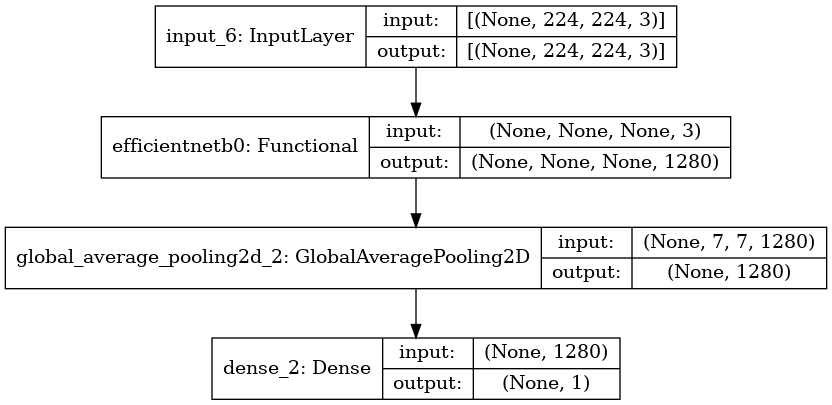

In [57]:
tf.keras.utils.plot_model(model_1, show_shapes=True)


In [58]:
# Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [59]:
# Create EarlyStopping callback and TensorBoard callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
    monitor="val_loss"
)

In [60]:
# Fit model
import wandb
# wandb.tensorboard.patch(root_logdir="logs")
wandb.init(project="100k-livestream-video", sync_tensorboard=True)
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        callbacks=[early_stopping,
                                   create_tensorboard_callback("logs", model_1.name)],
                        class_weight=class_weight) # adjust for different numbers of classes...

global_step,▁▁▂▂▄▄▅▅▇▇█
train/epoch_accuracy,▁▆▇██
train/epoch_loss,█▃▂▂▁
train/global_step,▁▁▃▅▆█
validation/epoch_accuracy,▁▃▅▆█
validation/epoch_loss,█▄▃▂▁
validation/evaluation_accuracy_vs_iterations,▁▃▅▆█
validation/evaluation_loss_vs_iterations,█▄▃▂▁
validation/global_step,▁▃▅▆█
global_step,6780
train/epoch_accuracy,0.95275


2021-11-06 15:41:48.803261: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Saving TensorBoard log files to: logs/EfficientNetB0-V1/20211106-154151
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2021-11-06 15:41:51.293475: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-06 15:41:51.293491: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-06 15:41:51.293526: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.
2021-11-06 15:41:51.293542: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-11-06 15:41:51.293571: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1752] function cupti_interface_->Finalize()failed with error CUPTI could not be loaded or symbol could not be found.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
wandb: WARNING When using several event log directories, please call w

Epoch 1/5
   2/1356 [..............................] - ETA: 4:03 - loss: 5.8681e-05 - accuracy: 0.3906   

2021-11-06 15:41:54.830874: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-06 15:41:54.830896: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-06 15:41:54.830956: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1661] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.


   7/1356 [..............................] - ETA: 2:12 - loss: 3.6410e-05 - accuracy: 0.3527

2021-11-06 15:41:55.075272: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-06 15:41:55.076306: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1752] function cupti_interface_->Finalize()failed with error CUPTI could not be loaded or symbol could not be found.
2021-11-06 15:41:55.082010: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-06 15:41:55.084044: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-11-06 15:41:55.087251: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/EfficientNetB0-V1/20211106-154151/train/plugins/profile/2021_11_06_15_41_55
2021-11-06 15:41:55.088812: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/EfficientNetB0-V1/20211106-154151/train/plugins/profile/2021_11_06_15_41_55/danie

1239/1356 [==========================>...] - ETA: 3s - loss: 2.4084e-05 - accuracy: 0.7343

2021-11-06 15:42:31.936930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1355/1356 [============================>.] - ETA: 0s - loss: 2.4118e-05 - accuracy: 0.7336

wandb: WARNING When using several event log directories, please call wandb.tensorboard.patch(root_logdir="...") before wandb.init
2021-11-06 15:42:38.032108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1356/1356 [==============================] - 54s 38ms/step - loss: 2.4116e-05 - accuracy: 0.7336 - val_loss: 0.5380 - val_accuracy: 0.7487
Epoch 2/5
1243/1356 [==========================>...] - ETA: 3s - loss: 2.0795e-05 - accuracy: 0.7850

2021-11-06 15:43:23.049485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1355/1356 [============================>.] - ETA: 0s - loss: 2.0834e-05 - accuracy: 0.7839

2021-11-06 15:43:28.341994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1356/1356 [==============================] - 50s 37ms/step - loss: 2.0832e-05 - accuracy: 0.7839 - val_loss: 0.4786 - val_accuracy: 0.7826
Epoch 3/5
1243/1356 [==========================>...] - ETA: 3s - loss: 1.9526e-05 - accuracy: 0.7999

2021-11-06 15:44:13.383619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1355/1356 [============================>.] - ETA: 0s - loss: 1.9693e-05 - accuracy: 0.7978

2021-11-06 15:44:18.701850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1356/1356 [==============================] - 50s 37ms/step - loss: 1.9693e-05 - accuracy: 0.7978 - val_loss: 0.4712 - val_accuracy: 0.7874
Epoch 4/5
1241/1356 [==========================>...] - ETA: 3s - loss: 1.8878e-05 - accuracy: 0.8068

2021-11-06 15:45:03.748715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1355/1356 [============================>.] - ETA: 0s - loss: 1.8999e-05 - accuracy: 0.8057

2021-11-06 15:45:09.113899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1356/1356 [==============================] - 50s 37ms/step - loss: 1.8999e-05 - accuracy: 0.8057 - val_loss: 0.4444 - val_accuracy: 0.7992
Epoch 5/5
1241/1356 [==========================>...] - ETA: 3s - loss: 1.8361e-05 - accuracy: 0.8128

2021-11-06 15:45:54.185051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1355/1356 [============================>.] - ETA: 0s - loss: 1.8489e-05 - accuracy: 0.8104

2021-11-06 15:45:59.547174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1356/1356 [==============================] - 50s 37ms/step - loss: 1.8487e-05 - accuracy: 0.8103 - val_loss: 0.4453 - val_accuracy: 0.7979


In [61]:
model_1.evaluate(test_data)

 67/340 [====>.........................] - ETA: 8s - loss: 0.4422 - accuracy: 0.8013

2021-11-06 15:46:09.529229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


340/340 [==============================] - 10s 29ms/step - loss: 0.4453 - accuracy: 0.7979


[0.445324569940567, 0.7978625297546387]

In [31]:
len(os.listdir("data/train/food_images/")), len(os.listdir("data/train/non_food_images/"))

(2267, 41281)

## Save Model

In [62]:
model_1.save("food_not_food_model_v1")

/home/daniel/code/tensorflow/env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: food_not_food_model_v1/assets


INFO:tensorflow:Assets written to: food_not_food_model_v1/assets


## Convert Model to TFLite for Deployment

In [63]:
# Convert the model
saved_model_dir = "food_not_food_model_v1"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('food_not_food_model_v1.tflite', 'wb') as f:
  f.write(tflite_model)

2021-11-06 15:46:56.481093: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-11-06 15:46:56.481119: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
2021-11-06 15:46:56.481122: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored change_concat_input_ranges.
2021-11-06 15:46:56.481284: I tensorflow/cc/saved_model/reader.cc:38] Reading SavedModel from: food_not_food_model_v1
2021-11-06 15:46:56.520554: I tensorflow/cc/saved_model/reader.cc:90] Reading meta graph with tags { serve }
2021-11-06 15:46:56.520567: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: food_not_food_model_v1
2021-11-06 15:46:56.520604: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-11-06 15:46:56.520608: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]  

## Test run TFLite model

In [66]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="food_not_food_model_v1.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.50539374]]


In [67]:
input_details

[{'name': 'serving_default_input_6:0',
  'index': 0,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([ -1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]